# 🧬 Reactome LNP Agent — Workflow Diagram

Creates a publication-quality workflow PDF using **Graphviz**.

In [1]:
import graphviz

g = graphviz.Digraph(
    'ReactomeLNPAgent',
    format='pdf',
    engine='dot',
    graph_attr={
        'rankdir': 'TB',
        'bgcolor': '#FAFAFA',
        'fontname': 'Helvetica',
        'pad': '0.5',
        'nodesep': '0.6',
        'ranksep': '0.8',
        'label': '🧬 Reactome LNP Agent — Ionizable Lipid Reaction Templates\nLangGraph + FAISS RAG + AWS Bedrock',
        'labelloc': 't',
        'fontsize': '20',
        'fontcolor': '#1a1a2e',
    },
    node_attr={
        'fontname': 'Helvetica',
        'fontsize': '11',
        'style': 'filled',
        'penwidth': '1.5',
    },
    edge_attr={
        'fontname': 'Helvetica',
        'fontsize': '9',
        'color': '#555555',
        'arrowsize': '0.8',
    },
)

In [2]:
# --- User Input cluster ---
with g.subgraph(name='cluster_input') as c:
    c.attr(label='User Input', style='rounded,dashed', color='#888888', fontcolor='#555555', fontsize='12')
    c.node('start', '▶  START', shape='circle', fillcolor='#2ecc71', fontcolor='white', width='0.9', fixedsize='true')
    c.node('query', '❓ User Query\n"Design a 3-tail ionizable\nlipid with amine heads..."',
           shape='note', fillcolor='#fff9c4', color='#f9a825', fontcolor='#333333')

In [3]:
# --- RAG Retrieval cluster (Blue) ---
with g.subgraph(name='cluster_rag') as c:
    c.attr(label='RAG Retrieval Layer', style='rounded,filled',
           color='#1565c0', fillcolor='#e3f2fd', fontcolor='#1565c0', fontsize='12')
    c.node('retrieve', '🔍 FAISS Retrieval\n(454 vectors, 1024-dim)',
           shape='box', fillcolor='#bbdefb', color='#1565c0', fontcolor='#0d47a1')

    # Data source cylinders
    c.node('ds_papers', '📄 Research Papers\n(4 PDFs, 148 pages)',
           shape='cylinder', fillcolor='#e8eaf6', color='#5c6bc0', fontcolor='#283593', fontsize='9')
    c.node('ds_rules', '📏 LNP Design Rules\n(MCTS, tail constraints)',
           shape='cylinder', fillcolor='#e8eaf6', color='#5c6bc0', fontcolor='#283593', fontsize='9')
    c.node('ds_rxn', '⚗️ Reaction Templates\n(13 SMARTS reactions)',
           shape='cylinder', fillcolor='#e8eaf6', color='#5c6bc0', fontcolor='#283593', fontsize='9')
    c.node('ds_data', '📊 Compound Data\n(217K blocks, 293 scores)',
           shape='cylinder', fillcolor='#e8eaf6', color='#5c6bc0', fontcolor='#283593', fontsize='9')

In [4]:
# --- Parallel Expert Analysis cluster (Purple) ---
with g.subgraph(name='cluster_experts') as c:
    c.attr(label='Parallel Expert Analysis (Claude Sonnet 4.5 via Bedrock)',
           style='rounded,filled', color='#6a1b9a', fillcolor='#f3e5f5', fontcolor='#6a1b9a', fontsize='12')
    c.node('rxn_expert', '⚗️ Reaction Expert\n\n• Applicable templates\n• Functional group matching\n• Reaction conditions\n• Known limitations',
           shape='box', fillcolor='#ce93d8', color='#6a1b9a', fontcolor='#1a1a2e')
    c.node('rules_expert', '📏 Design Rules Expert\n\n• Tail config (2-4 tails)\n• Symmetry preference\n• MCTS compatibility\n• Synthesizability check',
           shape='box', fillcolor='#ce93d8', color='#6a1b9a', fontcolor='#1a1a2e')

In [5]:
# --- Synthesis Planning cluster (Orange) ---
with g.subgraph(name='cluster_synthesis') as c:
    c.attr(label='Synthesis Planning', style='rounded,filled',
           color='#e65100', fillcolor='#fff3e0', fontcolor='#e65100', fontsize='12')
    c.node('synth', '🧪 Synthesis Planner\n\n• Step-by-step route\n• Reaction ID sequence\n• Building block selection\n• MCTS action sequence',
           shape='box', fillcolor='#ffcc80', color='#e65100', fontcolor='#1a1a2e')

In [6]:
# --- Final Output cluster (Green) ---
with g.subgraph(name='cluster_output') as c:
    c.attr(label='Output', style='rounded,dashed', color='#888888', fontcolor='#555555', fontsize='12')
    c.node('final', '📋 Final Answer\n\n• Recommended reactions\n• Design rule compliance\n• Actionable synthesis route\n• Caveats & next steps',
           shape='box', fillcolor='#a5d6a7', color='#2e7d32', fontcolor='#1a1a2e')
    c.node('end', '⏹  END', shape='circle', fillcolor='#e74c3c', fontcolor='white', width='0.9', fixedsize='true')

In [7]:
# --- Tech Stack annotation ---
g.node('tech',
    'Tech Stack\n─────────────────────\n'
    'Vector DB:  FAISS (local)\n'
    'Embeddings: Titan Embed v2\n'
    'LLM:  Claude Sonnet 4.5\n'
    'Framework:  LangGraph\n'
    'Cloud:  AWS Bedrock',
    shape='note', fillcolor='#eceff1', color='#90a4ae', fontcolor='#37474f', fontsize='10',
)

In [8]:
# --- Edges ---

# Input flow
g.edge('start', 'query')
g.edge('query', 'retrieve', label='  query')

# Data sources feed into retriever (dashed)
for ds in ['ds_papers', 'ds_rules', 'ds_rxn', 'ds_data']:
    g.edge(ds, 'retrieve', style='dashed', color='#90a4ae', arrowsize='0.6')

# Retriever fans out to parallel experts
g.edge('retrieve', 'rxn_expert', label='  context', color='#1565c0', penwidth='2')
g.edge('retrieve', 'rules_expert', label='  context', color='#1565c0', penwidth='2')

# Experts converge to synthesis planner
g.edge('rxn_expert', 'synth', label='  reaction\n  analysis', color='#6a1b9a', penwidth='2')
g.edge('rules_expert', 'synth', label='  rules\n  check', color='#6a1b9a', penwidth='2')

# Synthesis to final answer
g.edge('synth', 'final', label='  synthesis\n  plan', color='#e65100', penwidth='2')
g.edge('final', 'end')

✓ PDF saved: test_graph.pdf


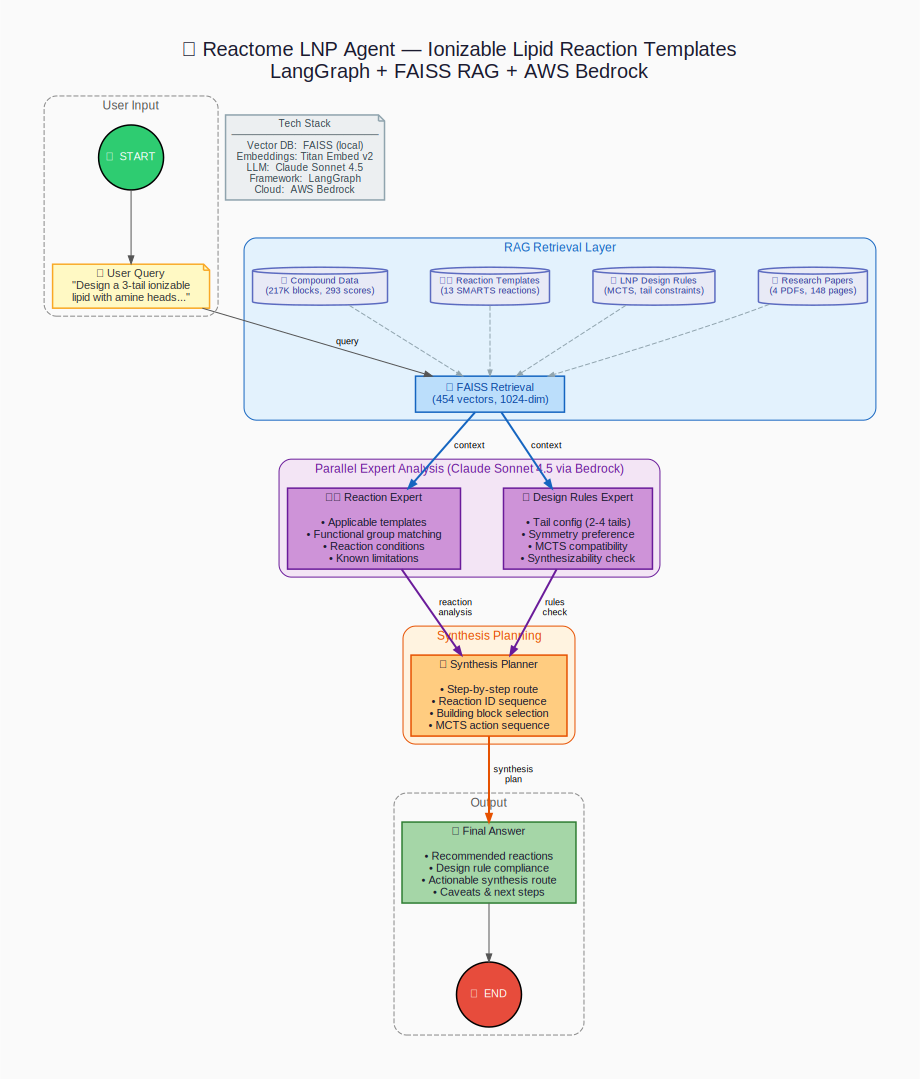

In [9]:
# Render to PDF
output_path = g.render('test_graph', cleanup=True)
print(f'✓ PDF saved: {output_path}')

# Also display inline in notebook
g